In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from artificial_data import get_degree_dist
from cada import cada
from sklearn.metrics import f1_score
from vars import vars
from time import process_time as pt
var = vars()

c:\Users\Jesper\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [25]:
#Read data
pr_graphs = []
for p in var.p_ls:
    path = f"art_data/artdat-p{p}.txt"
    pr_graphs.append(nx.read_adjlist(path,nodetype=int))

n_graphs = []
for n in var.n_ls:
    path = f"art_data/artdat-n{n}.txt"
    n_graphs.append(nx.read_adjlist(path,nodetype=int))


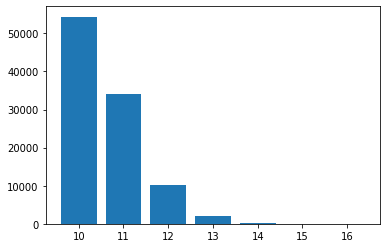

101000
101000


In [11]:
#Over look of degree_distributions
val,cnt = get_degree_dist(pr_graphs[2])
#print(val)
#print(cnt)
plt.bar(val,cnt)
plt.show()

Calculate f1-score (probability runs)

In [4]:
#init parameters
n_inj = int(var.n_default/100)
n_trials = 5
ground_truth = np.zeros(pr_graphs[0].number_of_nodes())
ground_truth[var.n_default:] = 1

In [5]:
#Louvain
#(2m20s for one graph iter => 15min-ich)
pr_f1_lv = np.zeros(shape=(len(pr_graphs),n_trials))
for ind,pr_g in enumerate(pr_graphs): 
    for trial in range(n_trials):
        #Train cada
        cada_lv = cada(pr_g, algorithm='louvain')
        #Predict anomalies
        pred = cada_lv.clf(n_inj)
        pr_f1_lv[ind,trial] = f1_score(ground_truth,pred)

In [6]:
#Infomap
pr_f1_info = np.zeros(shape=(len(pr_graphs),n_trials))
for ind,pr_g in enumerate(pr_graphs): 
    for trial in range(n_trials):
        cada_info = cada(pr_g,algorithm='infomap')
        pred = cada_info.clf(n_inj)
        pr_f1_info[ind,trial] = f1_score(ground_truth,pred)

In [7]:
#Leiden
pr_f1_leiden = np.zeros(shape=(len(pr_graphs),n_trials))
for ind,pr_g in enumerate(pr_graphs): 
    for trial in range(n_trials):
        cada_leiden = cada(pr_g,algorithm='leiden')
        pred = cada_leiden.clf(n_inj)
        pr_f1_leiden[ind,trial] = f1_score(ground_truth,pred)

In [8]:
#Fluid
pr_f1_fluid = np.zeros(shape=(len(pr_graphs),n_trials))
for ind,pr_g in enumerate(pr_graphs): 
    for trial in range(n_trials):
        cada_fluid = cada(pr_g,algorithm='fluid')
        pred = cada_fluid.clf(n_inj)
        pr_f1_fluid[ind,trial] = f1_score(ground_truth,pred)

[0.        0.        0.0004899 0.        0.0004    0.0004   ]
[0. 0. 0. 0. 0. 0.]
[0.         0.00135647 0.00167332 0.00913017 0.00256125 0.0008    ]
[0.00471593 0.00172047 0.00427083 0.00471593 0.00213542 0.0009798 ]


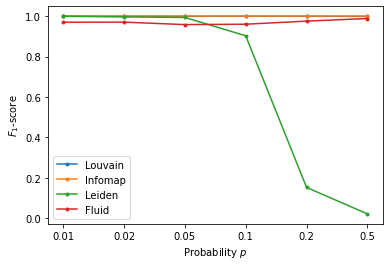

In [10]:
plt.figure()
#plt.errorbar(var.p_ls.astype('str'),np.mean(pr_f1_lv,axis=1),marker='.',c='tab:blue',yerr=np.std(pr_f1_lv,axis=1))
#plt.errorbar(var.p_ls.astype('str'),np.mean(pr_f1_info,axis=1),marker='.',c='tab:orange',yerr=np.std(pr_f1_info,axis=1))
#plt.errorbar(var.p_ls.astype('str'),np.mean(pr_f1_leiden,axis=1),marker='.',c='tab:green',yerr=np.std(pr_f1_leiden,axis=1))
#plt.errorbar(var.p_ls.astype('str'),np.mean(pr_f1_fluid,axis=1),marker='.',c='tab:red',yerr=np.std(pr_f1_fluid,axis=1))
plt.plot(var.p_ls.astype('str'),np.mean(pr_f1_lv,axis=1),marker='.',c='tab:blue')
print(np.std(pr_f1_lv,axis=1))
plt.plot(var.p_ls.astype('str'),np.mean(pr_f1_info,axis=1),marker='.',c='tab:orange')
print(np.std(pr_f1_info,axis=1))
plt.plot(var.p_ls.astype('str'),np.mean(pr_f1_leiden,axis=1),marker='.',c='tab:green')
print(np.std(pr_f1_leiden,axis=1))
plt.plot(var.p_ls.astype('str'),np.mean(pr_f1_fluid,axis=1),marker='.',c='tab:red')
print(np.std(pr_f1_fluid,axis=1))
#plt.plot([1,2,3],[1,4,3],marker='.')
plt.xlabel(r'Probability $p$')
plt.ylabel(r'$F_1$-score')
plt.legend(['Louvain','Infomap','Leiden','Fluid'])
plt.savefig('prob_plt.png',bbox_inches='tight')
plt.show()


Calculate F1-scores n-runs (also include cpu-time)

In [26]:
#init parameters
n_trials = 5

In [27]:
#Louvain
n_f1_lv = np.zeros(shape=(len(n_graphs),n_trials))
t_lv = np.zeros(shape=(len(n_graphs),n_trials))
for ind,g in enumerate(n_graphs): 
    #init variables
    n_inj = int(var.n_ls[ind]/100)
    ground_truth = np.zeros(g.number_of_nodes())
    ground_truth[var.n_ls[ind]:] = 1
    for trial in range(n_trials):
        #Train cada
        t0 = pt()
        cada_lv = cada(g, algorithm='louvain')
        t1 = pt()
        t_lv[ind,trial] = t1 - t0
        #Predict anomalies
        pred = cada_lv.clf(n_inj)
        n_f1_lv[ind,trial] = f1_score(ground_truth,pred)

In [28]:
#Infomap
n_f1_info = np.zeros(shape=(len(n_graphs),n_trials))
t_info = np.zeros(shape=(len(n_graphs),n_trials))
for ind,g in enumerate(n_graphs): 
    n_inj = int(var.n_ls[ind]/100)
    ground_truth = np.zeros(g.number_of_nodes())
    ground_truth[var.n_ls[ind]:] = 1
    for trial in range(n_trials):
        t0 = pt()
        cada_info = cada(g, algorithm='infomap')
        t1 = pt()
        t_info[ind,trial] = t1 - t0
        pred = cada_info.clf(n_inj)
        n_f1_info[ind,trial] = f1_score(ground_truth,pred)

In [29]:
#Leiden
n_f1_leiden = np.zeros(shape=(len(n_graphs),n_trials))
t_leiden = np.zeros(shape=(len(n_graphs),n_trials))
for ind,g in enumerate(n_graphs): 
    n_inj = int(var.n_ls[ind]/100)
    ground_truth = np.zeros(g.number_of_nodes())
    ground_truth[var.n_ls[ind]:] = 1
    for trial in range(n_trials):
        t0 = pt()
        cada_leiden = cada(g, algorithm='leiden')
        t1 = pt()
        t_leiden[ind,trial] = t1 - t0
        pred = cada_leiden.clf(n_inj)
        n_f1_leiden[ind,trial] = f1_score(ground_truth,pred)

In [30]:
#Fluid
n_f1_fluid = np.zeros(shape=(len(n_graphs),n_trials))
t_fluid = np.zeros(shape=(len(n_graphs),n_trials))
for ind,g in enumerate(n_graphs): 
    n_inj = int(var.n_ls[ind]/100)
    ground_truth = np.zeros(g.number_of_nodes())
    ground_truth[var.n_ls[ind]:] = 1
    for trial in range(n_trials):
        t0 = pt()
        cada_fluid = cada(g, algorithm='fluid')
        t1 = pt()
        t_fluid[ind,trial] = t1 - t0
        pred = cada_fluid.clf(n_inj)
        n_f1_fluid[ind,trial] = f1_score(ground_truth,pred)

[0.04898979 0.0509902  0.02332381 0.01356466 0.00374166 0.
 0.         0.         0.        ]
[0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 1.11022302e-16 4.89897949e-03
 7.34846923e-03 3.70944740e-03 1.16619038e-03 9.69535971e-04
 4.07921561e-04]
[8.00000000e-02 7.07106781e-02 5.45527268e-02 1.93907194e-02
 4.89897949e-03 5.51361950e-03 2.57681975e-03 1.39283883e-03
 9.79795897e-05]


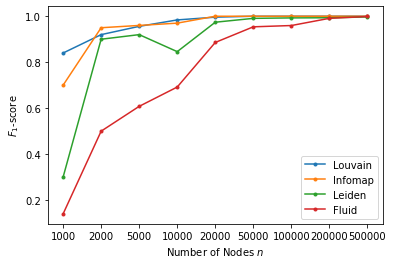

In [31]:
plt.figure()
#plt.errorbar(var.n_ls.astype('str'),np.mean(n_f1_lv,axis=1),marker='.',c='tab:blue',yerr=np.std(n_f1_lv,axis=1))
#plt.errorbar(var.n_ls.astype('str'),np.mean(n_f1_info,axis=1),marker='.',c='tab:orange',yerr=np.std(n_f1_info,axis=1))
#plt.errorbar(var.n_ls.astype('str'),np.mean(n_f1_leiden,axis=1),marker='.',c='tab:green',yerr=np.std(n_f1_leiden,axis=1))
#plt.errorbar(var.n_ls.astype('str'),np.mean(n_f1_fluid,axis=1),marker='.',c='tab:red',yerr=np.std(n_f1_fluid,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(n_f1_lv,axis=1),marker='.',c='tab:blue')
print(np.std(n_f1_lv,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(n_f1_info,axis=1),marker='.',c='tab:orange')
print(np.std(n_f1_info,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(n_f1_leiden,axis=1),marker='.',c='tab:green')
print(np.std(n_f1_leiden,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(n_f1_fluid,axis=1),marker='.',c='tab:red')
print(np.std(n_f1_fluid,axis=1))
plt.xlabel(r'Number of Nodes $n$')
plt.ylabel(r'$F_1$-score')
plt.legend(['Louvain','Infomap','Leiden','Fluid'])
plt.savefig('n_plt.png',bbox_inches='tight')
plt.show()

[ 0.01530931  0.02724312  0.14217891  0.26231392  0.18184171  2.27272809
  2.04823667  4.71465468 11.05590817]
[0.01169268 0.01822172 0.0125     0.01711633 0.025      0.02898006
 0.27838822 0.07434611 0.52128522]
[0.01530931 0.01530931 0.02119478 0.02538762 0.08112972 0.08052562
 0.34189842 0.67925453 2.08001559]
[ 0.04800716  0.05376453  0.26357666  0.25863977  0.4564426   1.86441282
 11.85778604  5.43619417 12.05840847]


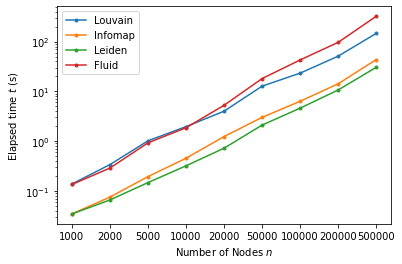

In [33]:
#cpu-time
plt.figure()
plt.plot(var.n_ls.astype('str'),np.mean(t_lv,axis=1),marker='.',c='tab:blue')
print(np.std(t_lv,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(t_info,axis=1),marker='.',c='tab:orange')
print(np.std(t_info,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(t_leiden,axis=1),marker='.',c='tab:green')
print(np.std(t_leiden,axis=1))
plt.plot(var.n_ls.astype('str'),np.mean(t_fluid,axis=1),marker='.',c='tab:red')
print(np.std(t_fluid,axis=1))
plt.yscale('log')
plt.xlabel(r'Number of Nodes $n$')
plt.ylabel(r'Elapsed time $t$ (s)')
plt.legend(['Louvain','Infomap','Leiden','Fluid'])
plt.savefig('time_plt.png',bbox_inches='tight')
plt.show()

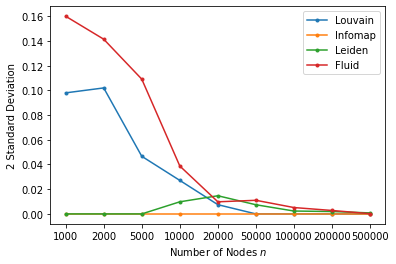

In [5]:
std_lv = 2*np.array([0.04898979, 0.0509902,  0.02332381, 0.01356466, 0.00374166, 0., 0., 0.,    0.        ])
std_info = 2*np.array([0.00000000e+00, 1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])
std_leiden = 2*np.array([0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 4.89897949e-03,
 7.34846923e-03, 3.70944740e-03, 1.16619038e-03, 9.69535971e-04,
 4.07921561e-04])
std_fluid = 2*np.array([8.00000000e-02, 7.07106781e-02, 5.45527268e-02, 1.93907194e-02,
 4.89897949e-03, 5.51361950e-03, 2.57681975e-03, 1.39283883e-03,
 9.79795897e-05])

plt.figure()
plt.plot(var.n_ls.astype('str'),std_lv,marker='.',c='tab:blue')
plt.plot(var.n_ls.astype('str'),std_info,marker='.',c='tab:orange')
plt.plot(var.n_ls.astype('str'),std_leiden,marker='.',c='tab:green')
plt.plot(var.n_ls.astype('str'),std_fluid,marker='.',c='tab:red')
#plt.yscale('log')
plt.xlabel(r'Number of Nodes $n$')
plt.ylabel(r'2 Standard Deviation')
plt.legend(['Louvain','Infomap','Leiden','Fluid'])
plt.savefig('std_plt.png',bbox_inches='tight')
plt.show()